# An Introduction to Copulas

<a id='intro'></a>

Dependence refers to the relationship between two random variables. One way to investigate this relationship is through correlations of joint distribution of the variables. However, there are limitations in using correlations, such as its feasability at high dimensions and inability to capture dependence that is not consistent throughout the distribution. Copulas are a tool which can be used to model this relationship, but address some of the issues associated with dependence modelling in various applications. It uses the joint distribution of marginal distributions of the random variables instead. Copulas allow for the study of the dependence between random variables and also constructing families of multivariate distributions.

Formally, copulas are joint distribution functions of marginals of random variables, which are uniformly distributed along the interval <a name="ref-1"/>[(Nelsen, 2007)](#cite-nelsen2007introduction). Its features make it a particular use for modelling financial risk. However, due to the ability to be a flexible dependence model and observe the joint probabilities of different non-normal distributions, it has found some uses in other areas of science, such as Neuroscience and medical fields. The conditions for copulas, tail dependencies and its applications are discussed in the following report. 

<a id='background'></a>

# Background

A joint probability distribution gives the probabilities that two variables occur and the dependence structure between them. For example, if given the variables, height and weight, the joint probability of the two variables would be used to answer questions relating to - the probability of a person being of height 150-170cm and of weight 50-60kg. 

For example, the joint probability distribution function of the random variables $X$ and $Y$ can be expressed by:

$$ F_{XY}(x,y) = P(X \leq x, Y \leq y) $$

Examining the relationship between two variables may be approached, using for example, correlation techniques, however as the number of dimensions increase, its usefulness decreases. Furthermore, the relationship between variables may not always be consistent and dependence may differ, for example in the tail ends of the distributions. 

Copulas aim to model the dependence between random variables. It can be defined as the joint distribution of marginal distributions of random variables, where the the marginal distribution is in the domain [0,1].


**Example 1**

The marginal distributions of random variables are identified as follows. If $X$ and $Y$ are random continuous variables, the marginal distribution function, would be a continuous function $F(x)$ and $G(y)$ respectively.

$$ F(x) = P[X \leq x] $$
$$ G(y) = P[Y \leq y] $$

1.0000000,0.6978169
0.6978169,1.0000000


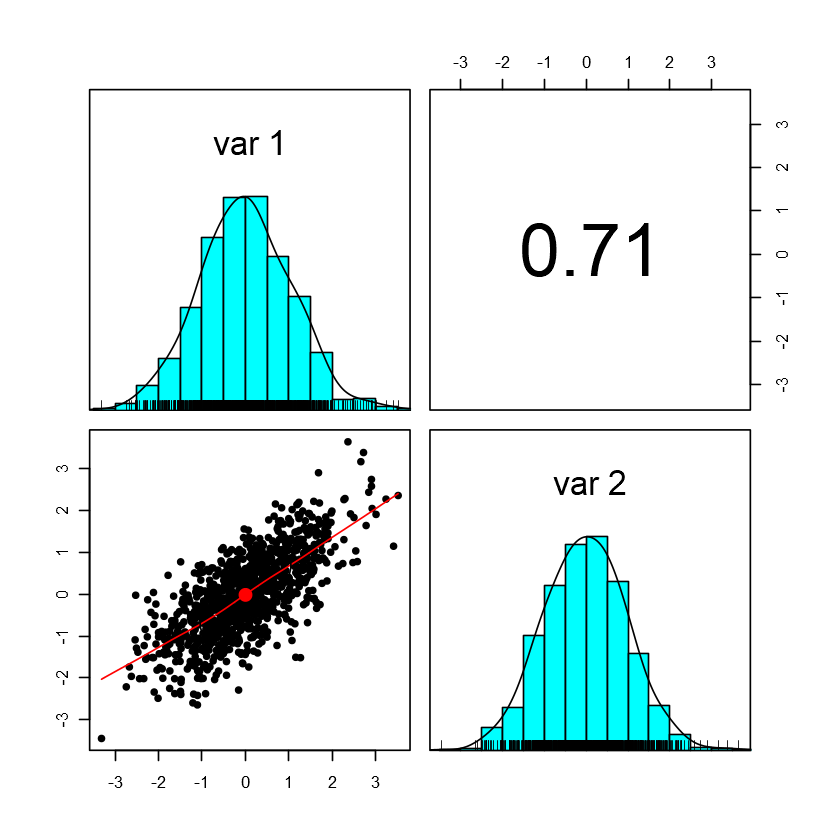

In [18]:
# the joint distribution between random continuous variables
library(MASS)
library(copula)
library(ggplot2)
library(psych)
set.seed(22)

n=1000
rho=0.7

# for this example, generated random variables with correlation 0.7
s = matrix(c(1, rho,
             rho, 1), 
           nrow=2) # correlation matrix

z <- mvrnorm(n, mu=rep(0, 2), Sigma=s)
cor(z,method='spearman')
pairs.panels(z)

In the above plot, the histograms of generated random variables $X$ and $Y$, visualise their respective marginal distributions, labelled as *var1* and *var2* respectively. The scatterplot, is the joint distribution for these variables, with a correlation coefficient $(\rho)$ of 0.71. 

By the definition of a copula, it is a joint distribution of uniform marginal distributions. Thus, using probability transform, it can be seen that the probability cumulative distribution functions of the marginals are uniform and continuous between [0,1]. 

Let $U$, be the transformed marginals for the generated sample.
$$ U_x = F(X) $$
$$ U_y = F(Y) $$

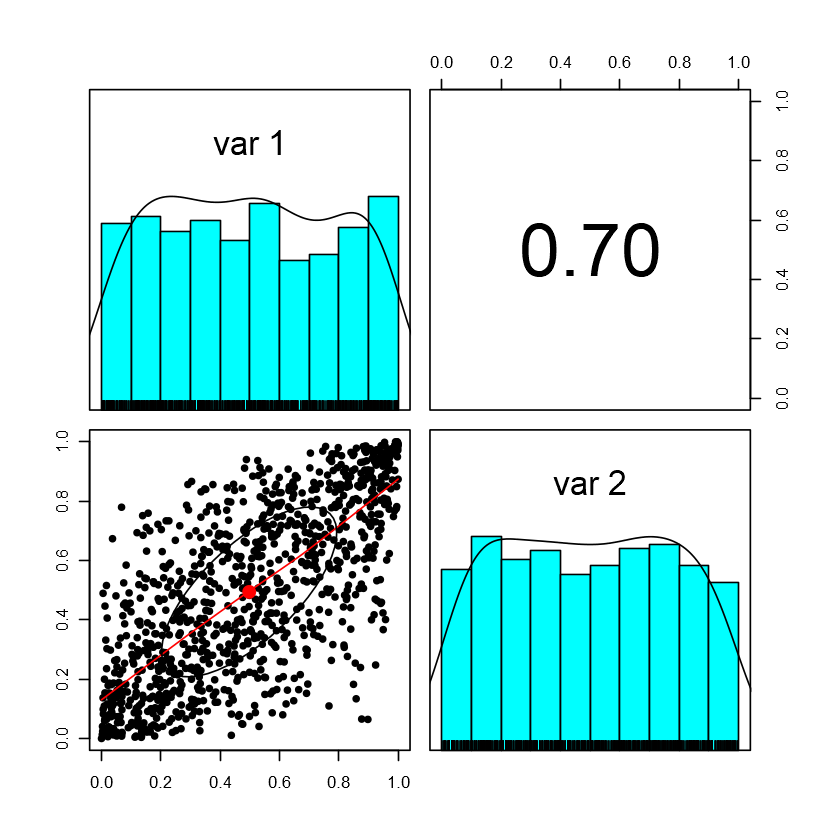

In [4]:
# probability transform of the marginal distribution

u <- pnorm(z) # probability cumulative distribution functions
pairs.panels(u)

It can be seen that the cumulative distribution of the marginals, are uniform between 0 and 1 for both random variables. The joint distribution for these marginals is the copula for the random variables $X$ and $Y$. This copula function contains the information on the dependence structure between the random variables. The information about the individual marginal distributions is able to be separated from the dependence structure.

Therefore, the copula $C$ of $X$ and $Y$ can be given as the joint distribution function of the uniform marginal distributions $U_x, U_y$

$$ C(u_x, u_y) = P[U_x \leq u_x, U_y \leq u_y] $$

**Example 2**

Copulas can also be used to model relationships between variables which are not distributed normally. The following examples have non-normal and skewed distributions, however when probability transformed, they are uniformly distributed between [0,1], and thus the joint distribution is a copula containing the dependence information between the two variables. *In Example 1*, the correlation between the variables is retained, and similarly in *Example 2*, the lack of depdence between the variables is demonstrated in the joint distribution of the uniform variables. 

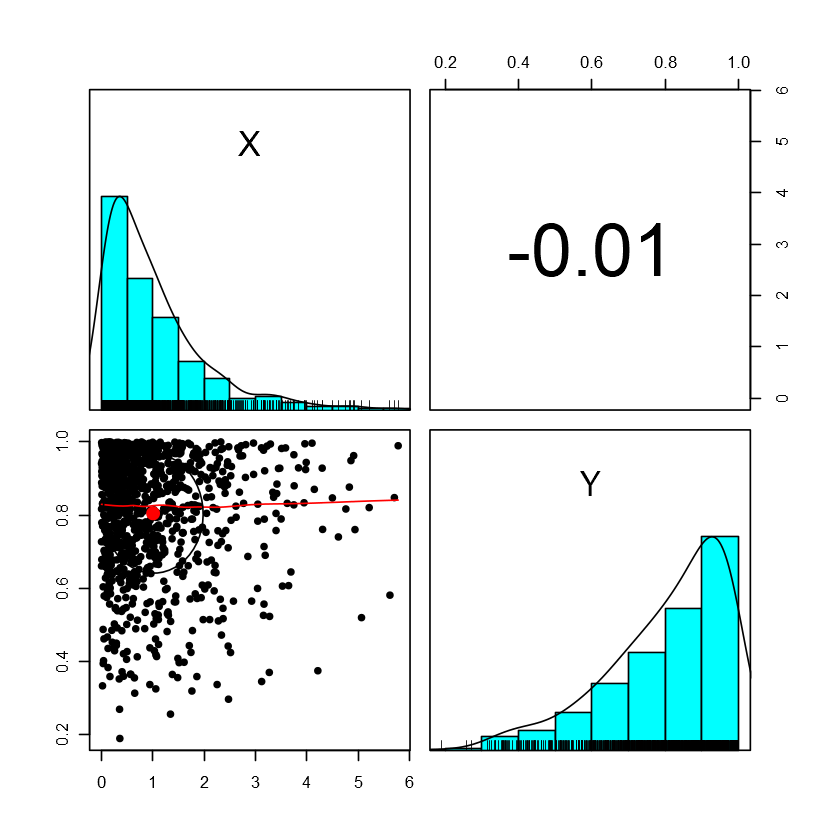

In [6]:
X = rgamma(1000, 1)
Y = rbeta(1000, 4, 1)
z = cbind(X,Y)
pairs.panels(z)

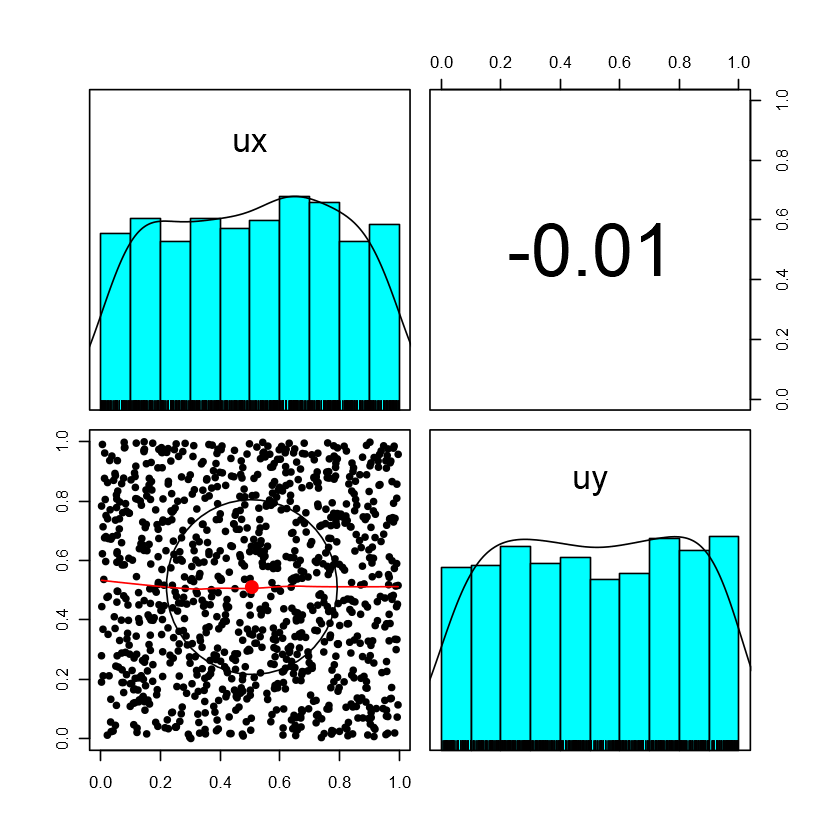

In [7]:
ux = pgamma(X, 1) # probability cumulative distribution functions
uy = pbeta(Y, 4, 1)

uz = cbind(ux, uy)
pairs.panels(uz)

This can be extended to multiple dimensions, and used for multivariate distributions. The flexibility of a copula, particularly makes it popular for use in risk modelling, as it can be used to model dependence in the tails of distributions. Additionally, another application is to construct families of multivariate distributions. 

<a id='results'></a>

------

# Fundamental Results

<a id='sklars'></a>

## Sklar's Theorem

Sklar's Theorem is fundamental for copulas, as it explains the role of copulas in the relationship between multivariate distribution functions and their marginal distributions. In general, it states that a joint distribution function is linked to a marginal distribution through a copula. Similarly, if there is a copula, or a collection of copulas, then there is also an associated marginal distribution. 

Theorem 2.3.3 in <a name="ref-2"/>[(Nelsen, 2007)](#cite-nelsen2007introduction):

Let $H(x,y)$ be the joint distribution function of the margins $F(x)$ and $G(y)$

$$ H(x,y) = P(X \leq x | Y \leq y) $$

Sklar's Theorem states that the joint distribution is linked to the marginal distributions through a copula $C$.

$$ H(x,y) = C (F(x), F(y)) $$

Additionally, if $F$ and $G$ are continuous, then the copula $C$ is unique, otherwise it is uniquely determined on RanF X RanG, where RanF and RanG denotes the range of the marginal distribution of F and G respectively.

Sklar's Theorem allows for the separation of the modelling of marginal distributions from the dependence structure, which is expressed in $C$, the copula. As can be seen in *Example 1* and *Example 2*, despite the transformation of distributions to uniform, the correlation between the variables is maintained. Thus, copulas retain the dependence information between the random variables and the marginal distribution is separately unaffected.

<a id='properties'></a>

## Properties of Copulas

There are certain properties which are required to determine whether a given joint distribution function is a copula. One of which is that the marginals of the joint probability distrition, is to be uniform and continuous between 0 and 1. 

### Conditions of Copulas

The conditions, which indicate whether a function is a copula are:

Let $C$ be a copula and $u$ and $v$ are points in the domain [0,1].

1. The function is grounded.

In this property, if any of the points is 0, then the probability given by the copula is equal to zero.

$$ C(u,0) = 0 \\
C(0,v) = 0 $$

2. That the function has uniform margins.

If any of the arguments in the function includes 1, then the result given by the function is equal to itself, either $u$ or $v$ in the function.

$$C(u, 1) = u$$
$$C(1,v) = v$$

3. The function is non-decreasing. 

For example in a bivariate copula, the domain would be on I X I, equivalent to [0,1] X [0,1]. For $(u_1, v_1), (u_2, v_2)$, the result of the equation, is greater than or equal to zero.

$$C(u_2, v_2) - C(u_2, v_1) - C(u_1, v_2) + C(u_1, v_1) \geq 0$$


Any function which satisfies these properties is a copula, and is extended to copulas with dimensions greater than 2.

### Independent Copulas

One of the simplest copulas is known as the independent copula. If random variables are completely non-dependent, then its copula can be shown as the product of the marginal distribution functions, the independent copula.

$$ C(F(x), F(y)) = F(x)F(y)$$

To show that it is indeed a copula, this function satisfies the 3 conditions for a copula.

$$\Pi(u,v)=uv$$

In [8]:
# I = [0,1], I^2 = [0,1] X [0,1]
u = 0
v = 1

u2 = 0
v2 = 1

# the independent copula
P = function(u, v){
    u*v
}

Condition 1) The function is grounded

In [9]:
#1) that it is grounded
P(0,v)
P(u,0)

[1] 0

[1] 0

Condition 2) The function is uniform

In [10]:
#2) It is uniform
P(u,1)
P(1,v)

[1] 0

[1] 1

Condition 3) It is a non-decreasing function

In [11]:
#3) It is an non-decreasing function
P(u2,v2) - P(u2,v) - P(u, v2) + P(u, v)

[1] 0

### The Frechet-Hoeffding Bounds

Other simple copulas are represented by the upper and lower bounds of copulas, known as the Frechet-Hoeffding bounds. It was found that a copula always lies in between a certain set of bounds. These bounds represent the extreme cases of dependency.

$$ max(u+v-1,0) \leq C(u) \leq min(u,v) $$

If the points of the domain form the vertices of a 3-dimensional cube, the copulas lie within these bounds. The following graphs visualise the minimum and maximum copulas.

In [12]:
# minimum and maximum copulas
par(mfrow=c(1,2))

n=1000
# correlation matrix
s = matrix(c(1, 1,
             1, 1), 
           nrow=2)

z <- mvrnorm(n, mu=rep(0, 2), Sigma=s)
u <- pnorm(z)

#### Mimum Copula

The minimum copula represents full positive dependency between the variables.

$$ C(F(x), F(y)) = min(F(x), F(y))$$

**Example 3**

The following graphs aim to visualise this dependency. If the copula of two random variables lie on the minimum copula, the dependence between them suggests that the probability of one variable occuring, increases as the other one increases. The left plot represents the joint distribution of the marginal variables, whereas on the left, it is the joint distribution of the uniform marginal variables.

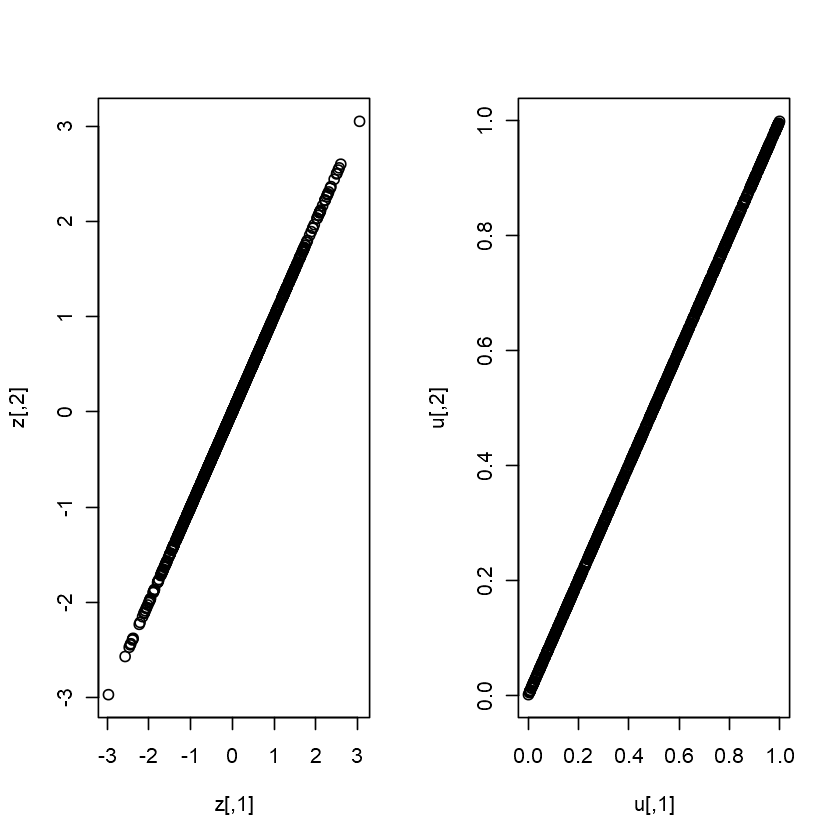

In [112]:
# generate a sample that is completely dependent
n=1000
# correlation matrix
s = matrix(c(1, 1,
             1, 1), 
           nrow=2)

z <- mvrnorm(n, mu=rep(0, 2), Sigma=s)
u <- pnorm(z)

par(mfrow=c(1,2))
plot(z) # the joint distribution of random variables
plot(u) # plot the joint distribution of uniform probability transform of the random variables


We can generate a Gaussian copula, with the dependence parameter of $\rho=0.99$ (very close to 1) and generate a sample from that copula. The dependence illustrated by this copula captures that positive dependence between the variables.

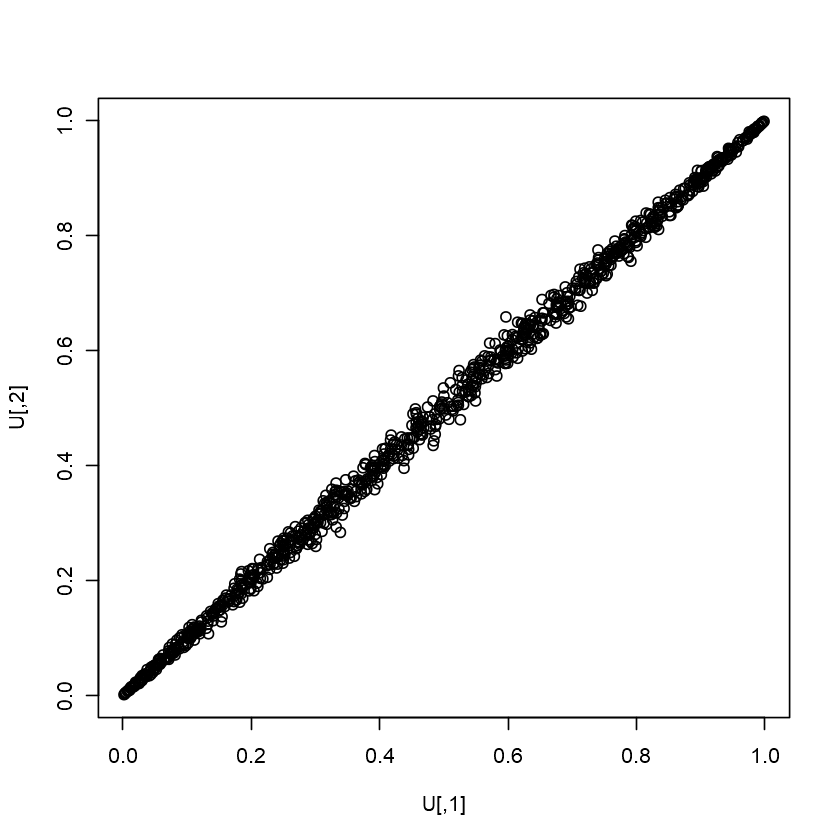

In [79]:
nc <- normalCopula(0.999)
U <- rCopula(n, copula=nc)
plot(U)

#### Maximum Copula

If a joint distribution is equal to the maximum bound, then the dependence is fully negative, suggesting that they are mutually exclusive. 

$$ C(F(x), F(y)) = max(F(x)+F(y)-1, 0)$$

Similarly, this dependence is visualised in the following

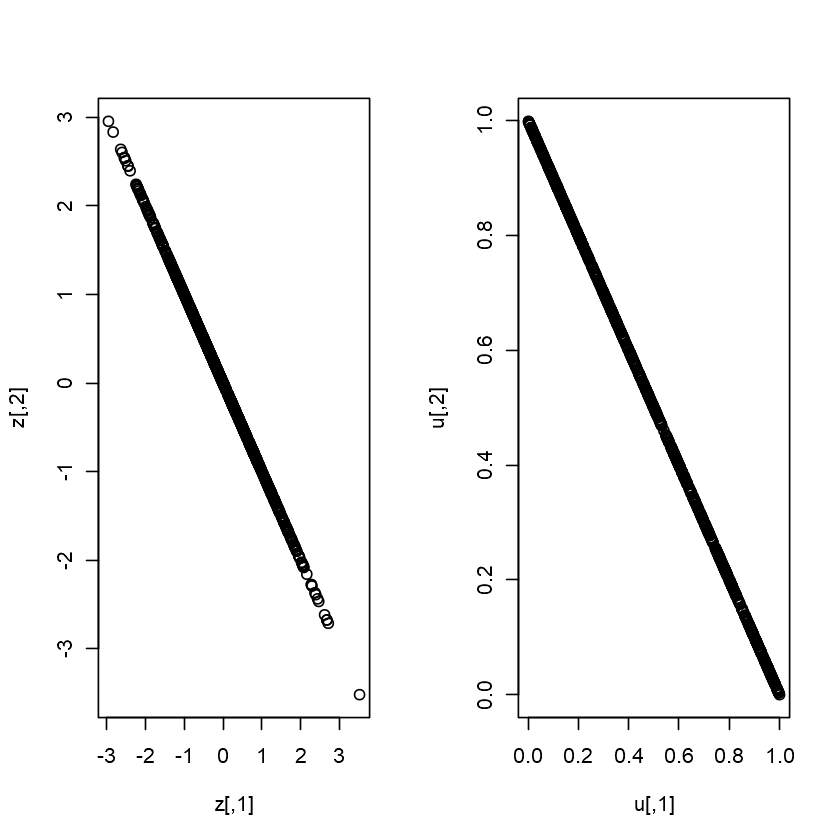

In [113]:
# generate a sample that is completely negatively dependent
n=1000
# correlation matrix
s = matrix(c(1, -1,
             -1, 1), 
           nrow=2)

z <- mvrnorm(n, mu=rep(0, 2), Sigma=s)
u <- pnorm(z)

par(mfrow=c(1,2))
plot(z) # the joint distribution of random variables
plot(u) # plot the joint distribution of uniform probability transform of the random variables


------

<a id='family'></a>

## Gaussian Copula and t-Copula

Families of copulas model different dependencies between distributions. Implicit copulas are derived from multivariate distributions and include Gaussian copula and t-copula, both of elliptical family distributions. Copulas can be visualised using density plots or contour plots, where the density is related to the strength of the dependence between varriables. A higher density is proportional to stronger dependence.

For Gaussian copulas, the modelling of dependence is associated with the correlation dependence, such as Spearman's rho ($\rho$). In *Example 4.1*, the density of a copula with parameter $\rho=0.7$ from *Example 1* is visualised. The positive direction of the relationship is clear, similar to the scatterplot in *Example 1*. As the parameter approaches 1 or -1, the density increases and narrows, showing a stronger dependency.

Additionally, for a Gaussian copula, with parameter $\rho=0$, the copula is an independent copula. We can demonstrate this by generating a Gaussian copula with this parameter (*Example 4.2*). The density is low and uniform throughout the plot.

Similarly, $\rho=1$ is a complete positive dependence between variables (*Example 4.3*) and $\rho=-1$ demonstrates a complete negative dependence between the variables (*Example 4.4*). These are the minimum and maximum copula bounds, respectively. 

**Example 4.1**
Gaussian copula with $\rho=0.7$

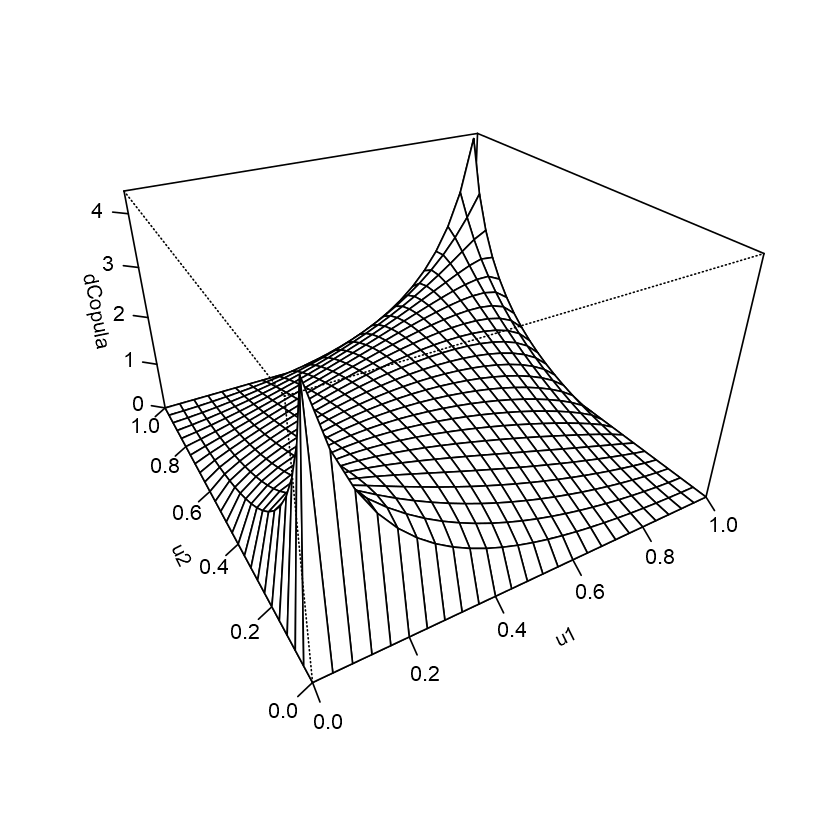

In [134]:
gauss_neg1 <- normalCopula(rho)
persp(gauss_neg1, dCopula)

**Example 4.2** Idependent Gaussian copula

lower upper 
    0     0

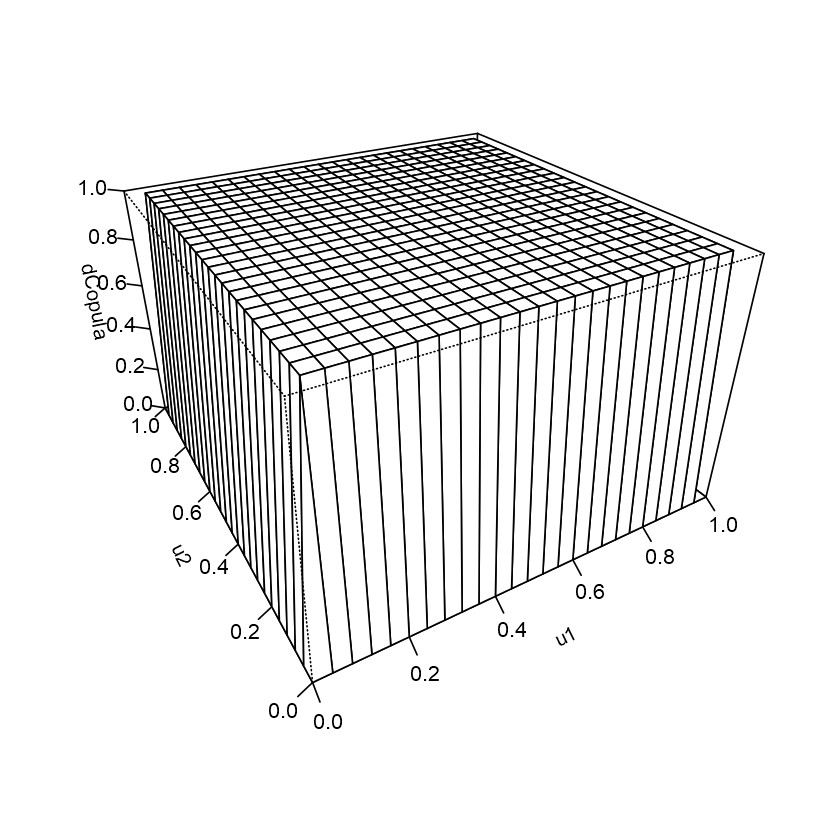

In [153]:
# generate a Gaussian copula with parameter rho=0 (an independent copula)
gauss_0 <- normalCopula(0)
persp(gauss_0, dCopula)

lambda(gauss_0)

**Example 4.3** Minimum gaussian copula

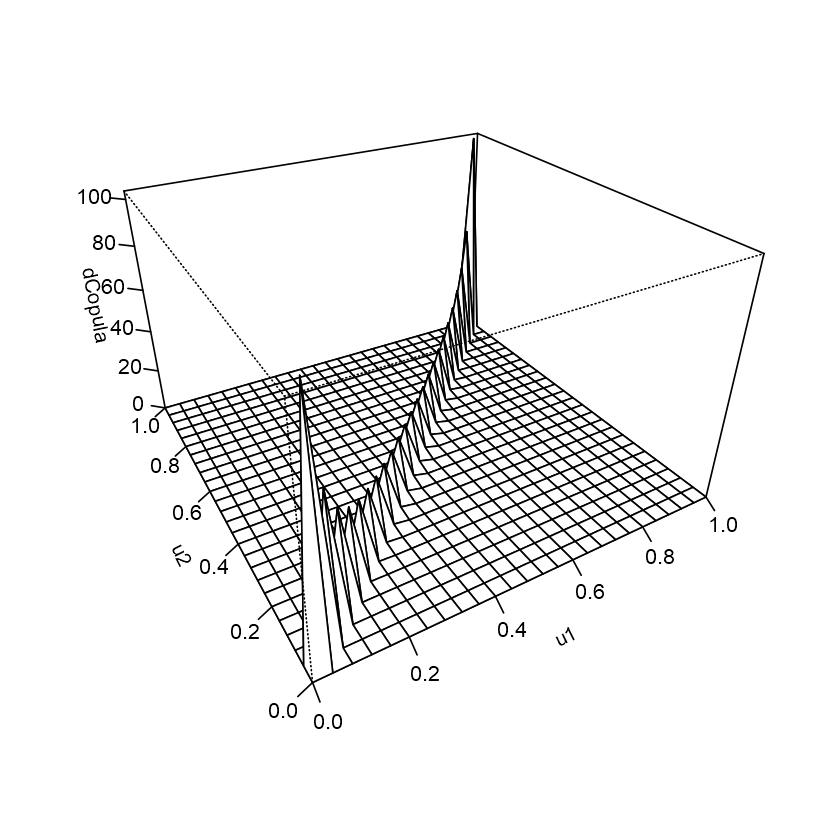

In [132]:
gauss_1 <- normalCopula(0.999)
persp(gauss_1, dCopula)

**Example 4.4** Maximum Gaussian Copula

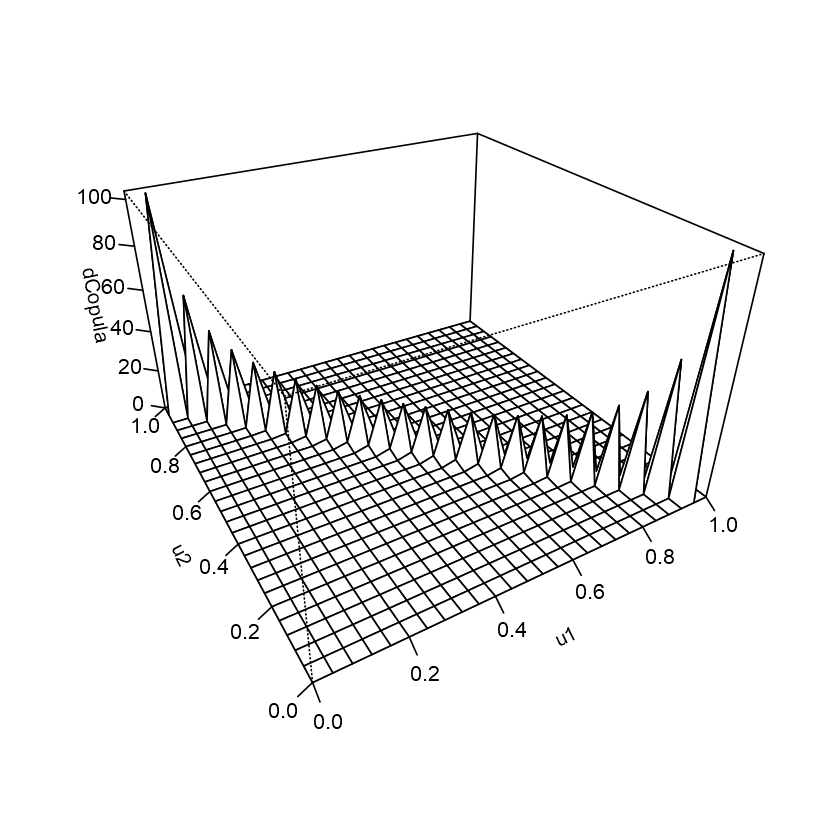

In [133]:
gauss_neg1 <- normalCopula(-0.999)
persp(gauss_neg1, dCopula)

For a t-copula, not only is the correlation parameter $\rho$ important, the degrees of freedom is also included, as is a difference between the normal Gaussian distribution and the Students t-distribution. Comonotonicity, referring to the fully positive dependence in a minimum copula at $\rho=1$ and the countermonotonicity, that is the fully negative dependence at a maximum copula at $\rho=-1$ are retained features for a t-copula. However, unlike in a Gaussian distribution, $\rho=0$ does not result in a completely independent copula. Additionally, from the graph in **Example 5.1**, compared to the Gaussian copula, with the same $\rho$ parameter, the peaks of the density at the corners of the plot are greater in density. This is due to the tail dependencies captured by a t-copula, that is not a feature present in the Gaussian copula.

**Example 5.1** t-Copula with $\rho=0.7$

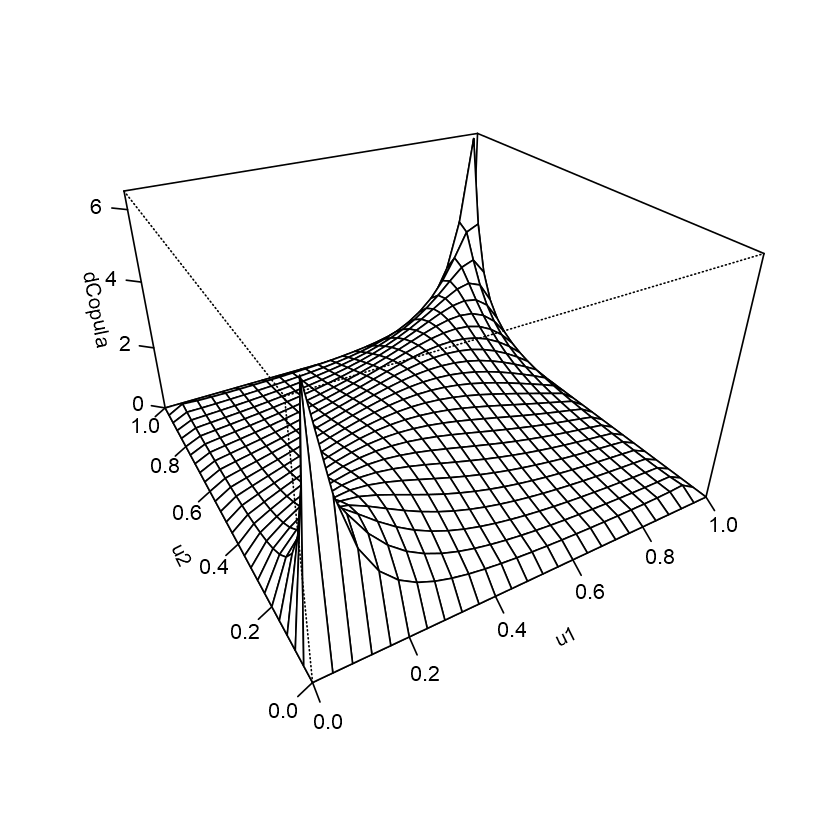

In [136]:
t_3 <- tCopula(rho, df=3)
persp(t_3, dCopula)

The tail dependencies in a t-Copula is associated with the additional degrees of freedom parameter for this distribution. In the following example, changing the degrees of freedom for the same $\rho$ parameter, changes the density of the tails. As the degrees of freedom approaches 0, the tail dependence strengthens. Conversely, as it approaches $\infty$, the density of the tail dependence approaches 0, suggesting a lack of dependence.

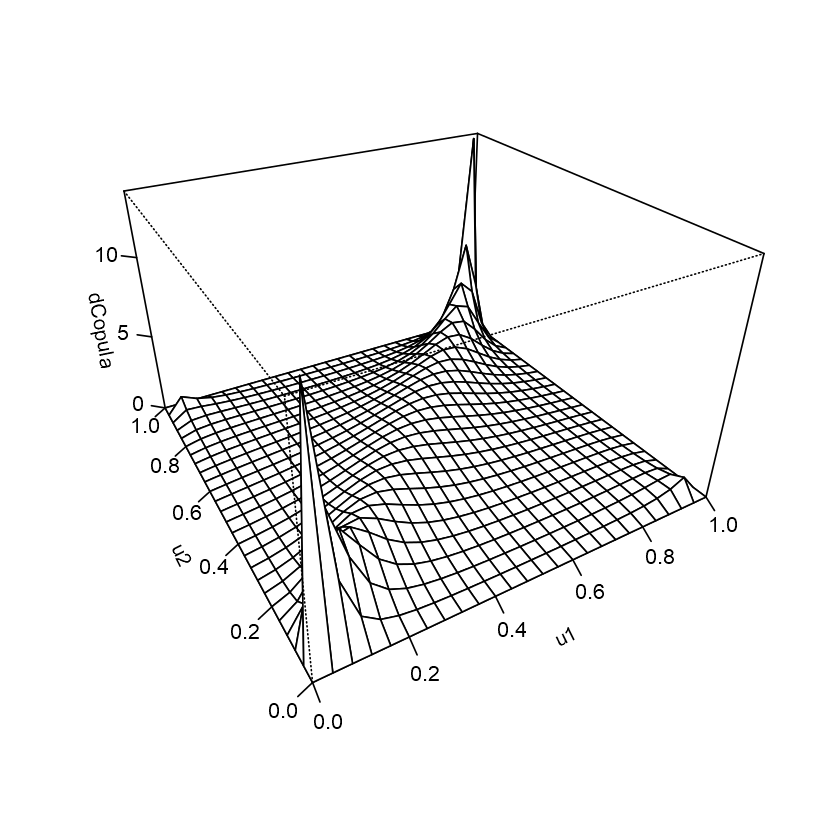

In [21]:
# changing the degrees of freedom parameter

t_6 <- tCopula(rho, df=1)
persp(t_6, dCopula)

Both the Gaussian and t-copula are symmetrical. Dependency is equal on both sides, for example the tail dependency in the t-copula is equal on both upper and lower tails. Other family of copulas, particularly Archimedean copulas, provide models for asymmetric copulas.

### Other Copulas

Briefly, other copulas exist that model asymmetric dependence. It was mentioned that dependency is not always consistent throughout the joint distribution. Other families of copulas provide the opportunity to fit a joint distribution that may have different dependencies at the tails and different dependencies between the tails. More popular are Archimedian copulas, which are stated as explicit and not derived from multivariate distributions, unlike Gaussian and t-copulas. The correlation parameter is not the driving parameter for the model, and typically only has one parameter that is required that is $\theta$. Three examples include the Gumbel (*Example 6.1*), Clayton (*Example 6.2*) and Frank Copulas (*Example 6.3*).

**Example 6.1**

The Gumbel copula can be formulated as

$$C(u,v) = exp(-((-ln{u})^\theta + (-ln {v}) ^ \theta)^{1/\theta})$$

The plot below shows that it captures the upper tail dependence and no dependence in the lower tail.

lower    upper 
0.000000 0.740079

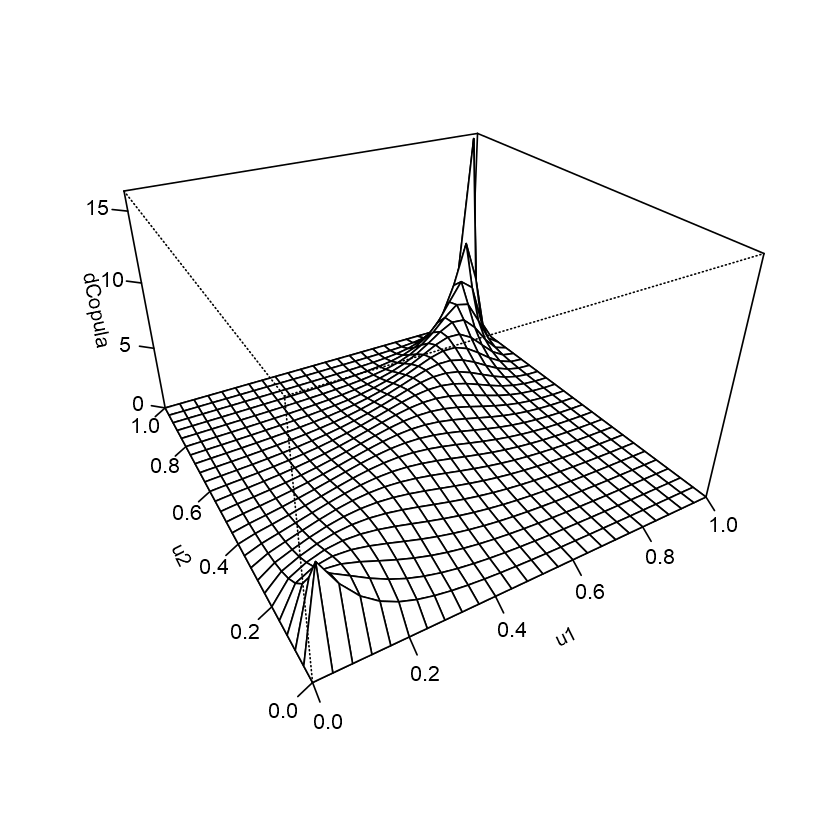

In [24]:
# Gumbel Copula

gumbel <- gumbelCopula(3)
persp(gumbel, dCopula)

lambda(gumbel)

**Example 6.2**

Clayton copula captures only lower tail dependence.

$$ C(u,v) = max([u^{-\theta} + v^{-\theta} -1]^{-1/\theta}, 0)$$

lower     upper 
0.7937005 0.0000000

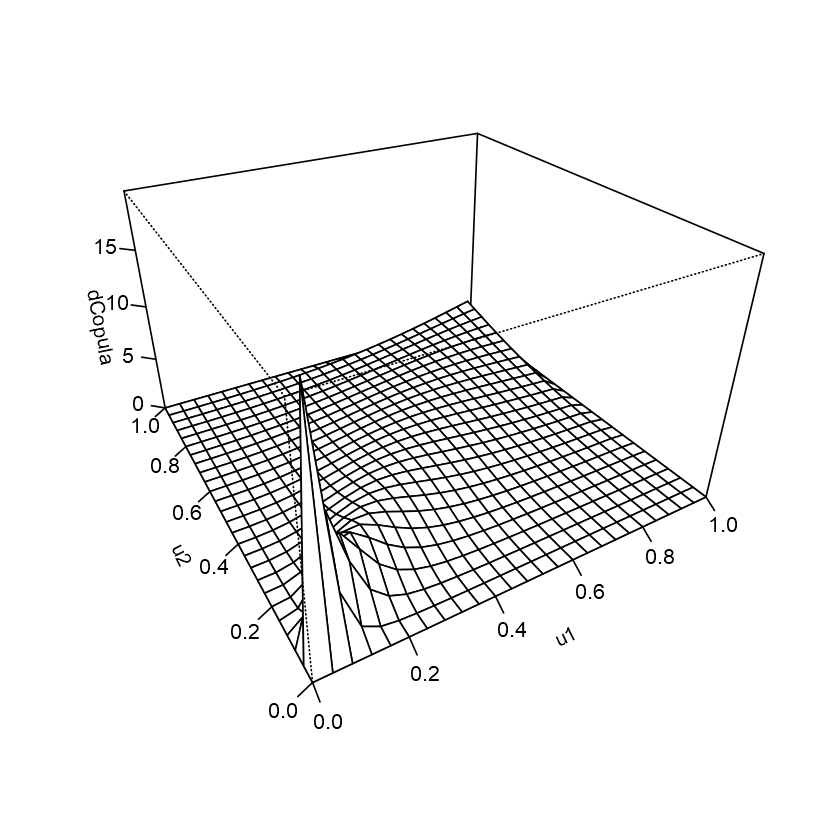

In [22]:
# Clayton copula

clayton <- claytonCopula(3)
persp(clayton, dCopula)

lambda(clayton) # tail dependence coefficient values

**Example 6.3**

A Frank Copula does not show tail dependence on either the upper or lower tail. It is instead uniform throughout.

lower upper 
    0     0

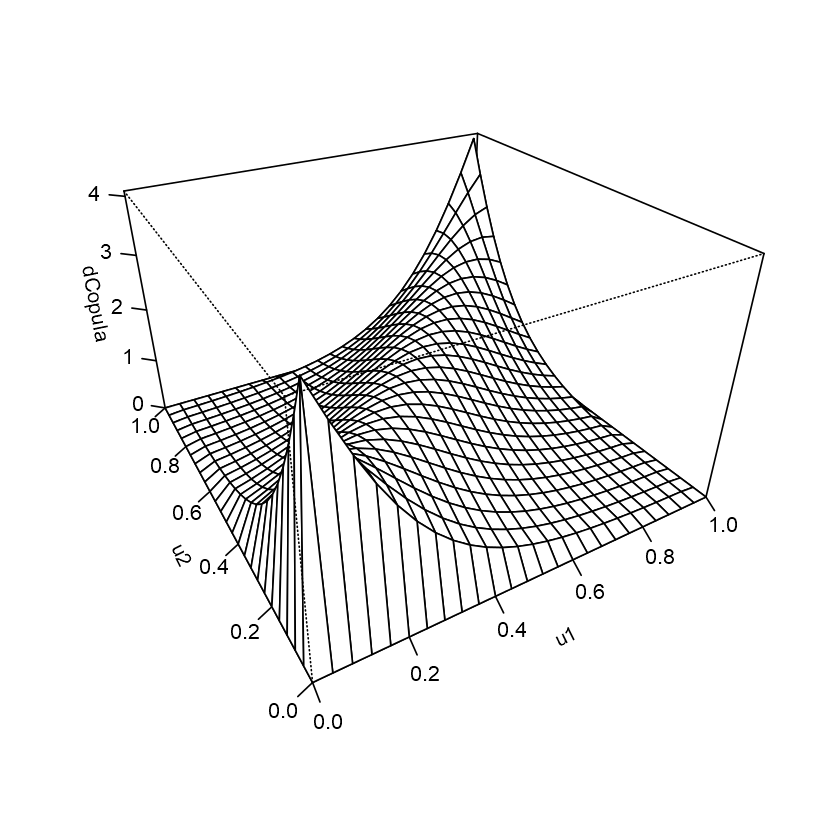

In [26]:
# Frank copula

frank <- frankCopula(3)
persp(frank, dCopula)

lambda(frank)

<a id='tail'></a>

## Tail Dependence

Copulas are used to capture dependence between random variables. As demonstrated in the previous examples, one of the unique features of copulas is that it is able to model tail dependencies. Visually, the plots above indicate the different tail dependencies captured by different families of copulas.They show the upper tail dependence on the upper corner of the plot, whereas the lower tail dependence is shown at the lower end, around the coordinates (0,0). Tail dependence refers to the probability of extreme values occuring. For example in a bivariate copula $C$, with marginals $F$ and $G$, the upper tail dependency would refer to the probability of large values of F, given large values of G. Similarly lower tail dependence is given as the probability of F having low values, given that G is low. Tail dependence is given by the calculated coefficient $\lambda$.


Definition 5.4.1 in <a name="ref-3"/>[(Nelsen, 2007)](#cite-nelsen2007introduction)

For random variables $X$ and $Y$ with distribution functions of $F$ and $G$, the coefficient for the upper tail dependence is the probability that Y is greater than the *t* percentile of $G$, given that $X$ is greater than the *t* precentile of $F$ as *t* approaches 1, where *t* is a given quantile threshold.

Let $G^{(-1)}(t) = y(t)$ and $F^{(-1)}(t) = x(t)$

The upper-tail dependence parameter $λ_U$

$$λ_U = \lim_{t{\rightarrow 1^{-}}} \mathrm{Pr}[Y > y(t)\mid X > x(t)]$$

The lower-tail dependence parameter $λ_L$ is defined as

$$λ_L = \lim_{t{\rightarrow 0^{+}}} \mathrm{Pr}[Y ≤ y(t)\mid X ≤ x(t)]$$

These forms are similar to joint probabilities, however only at given quantiles to observe the dependence only at the tails of the copulas. 

If the coefficient $\lambda_U > 0$ then the variables have upper tail dependence. If $\lambda_U = 0$, then the copula has no upper tail dependence. Similarly, if $\lambda_L < 0 $, there is a lower tail dependence between the variables. If $\lambda_L=0$, the lower tails are independent. The density of the copula when approaching the coordinates (0,0) or (1,1) also give a indication of its tail dependence, as a greater slope is associated with higher tail dependence. <a name="ref-4"/>[(Schmidt, 2007)](#cite-schmidt2007coping). 

The different copulas place greater weight on the dependence of tails. For example, the Gumbel copula has no lower tail dependence, but strong upper tail dependence, for any value of the $\theta$ parameter. This is also observed in the previous examples, including comparison of the tail dependence in Gaussian and t-copulas.

In [159]:
gumbel <- gumbelCopula(5)
lambda(gumbel)

lower     upper 
0.0000000 0.8513016

This is the opposite in Clayton Copulas. While changing the parameter, changes the strength of the depdence, there is no upper tail dependence shown. 

In [160]:
clayton <- claytonCopula(5)
lambda(clayton)

lower     upper 
0.8705506 0.0000000

<a id='applications'></a>

------

## Applications

### Financial Risk Management

Because of their flexibility in showing relationships that are inconsistent throught the model, copulas are useful for modelling, for example, financial risk. Traditional correlation measures do not capture tail dependence, unlike copulas. And in financial risk, extreme events can lead to large losses and thus, despite their low probability occuring, the dependence of these extreme events occuring can be seen using copulas. For example, in credit risk, tail dependence would be associated with the probability that a borrower exceeds a threshold, given that another borrower exceeds a threshold and resulting in excessive losses. Copulas provide a way to investigate these problems. <a name="ref-5"/>[(Kole, Koedijk and Verbeek, 2007)](#cite-kole2007selecting)


### Neuronal Spike Dependencies

Another less widely used application, is in the field of Neuroscience. There are a few studies which have used copulas for EEG data, to investigate neuronal spike rates and dependence between neuron activity. It is mentioned that there are few ways to model the neuron spike dependencies and may sometimes be ignored to treat the responses as independent <a name="ref-6"/>[(Berkes, Wood and Pillow, 2008)](#cite-berkes2008characterizing). Some studies have used copulas in neuroscience to bridge this gap and model complicated dependencies in the data.

<a name="ref-7"/>[(Berkes, Wood and Pillow, 2008)](#cite-berkes2008characterizing) study, constructed non-independent joint distributions of neuron firing rates using copulas. The authors chose to use construct copulas, because there is known strong dependencies between neurons. However, because of their Poisson distribution there are limited multivariate generalisation for the data. Their study used bivariate copulas, as it modelled dependence between pairs of neurons. This study explored a variety of copula models for joint neural response distributions between the pairs of neurons. Their results indicated that there was dependency between firing rate distributions, concentrated in the lower and upper tails. It should be noted that some assumptions were not held, though addressed by the authors, as a Poisson distribution is not continuous. While still possible, utilising discrete distributions for copulas comes with some complexity.

Another study, <a name="ref-8"/>[(Iyengar, Dauwels, Varshney and Cichocki, 2010)](#cite-iyengar2010quantifying) also used copulas to investigate interchannel dependence in EEG signals, using specifically Gaussian copula and t-copula. The authors emphasise the importance of choosing the appropriate copula model for the data. It is highlighted that copulas used in this way may be able to detect a change in the synchrony of EEG channels, which is useful in detecting things such as, Alzheimer's Disease and epileptic seizures. 

Both of these studies are a sample of research which indicate the possibilities of using copulas when studying neuron and EEG dependencies, due to their properties of multivariate joint probability and dependence. The authors indicate the lack of models available for investigating dependence for these kind of data and distributions and that the features of copulas provide a possibility for analysing expected dependencies that has not been well utilised. However, it is also mentioned that further exploration is required for using copulas in this way.

<a id='conclusions'></a>

# Conclusions

Copulas provide a way to study the dependence between random variables and model joint multivariate distributions. This has been particularly useful in model risk management because of the particular properties of copulas. This includes, modelling tail dependencies and extreme values and high dimensions, which is difficult to capture when using correlations. Further from this report, a greater detailed understanding of the various families of copulas and their applications, as well as the measures of dependence.

<a id='references'></a>

<!--bibtex

@article{berkes2008characterizing,
  title={Characterizing neural dependencies with copula models},
  author={Berkes, Pietro and Wood, Frank and Pillow, Jonathan},
  journal={Advances in neural information processing systems},
  volume={21},
  pages={129--136},
  year={2008}
}

@book{nelsen2007introduction,
  title={An introduction to copulas},
  author={Nelsen, Roger B},
  year={2007},
  publisher={Springer Science \& Business Media}
}

@article{schmidt2007coping,
  title={Coping with copulas},
  author={Schmidt, Thorsten},
  journal={Copulas-From theory to application in finance},
  volume={3},
  pages={34},
  year={2007}
}

@article{kole2007selecting,
  title={Selecting copulas for risk management},
  author={Kole, Erik and Koedijk, Kees and Verbeek, Marno},
  journal={Journal of Banking \& Finance},
  volume={31},
  number={8},
  pages={2405--2423},
  year={2007},
  publisher={Elsevier}
}

@inproceedings{iyengar2010quantifying,
  title={Quantifying EEG synchrony using copulas},
  author={Iyengar, Satish G and Dauwels, Justin and Varshney, Pramod K and Cichocki, Andrzej},
  booktitle={2010 IEEE International Conference on Acoustics, Speech and Signal Processing},
  pages={505--508},
  year={2010},
  organization={IEEE}
}

-->

# References

<a name="cite-nelsen2007introduction"/><sup>[^](#ref-1) [^](#ref-2) [^](#ref-3) </sup>Nelsen, Roger B. 2007. _An introduction to copulas_.

<a name="cite-schmidt2007coping"/><sup>[^](#ref-4) </sup>Schmidt, Thorsten. 2007. _Coping with copulas_.

<a name="cite-kole2007selecting"/><sup>[^](#ref-5) </sup>Kole, Erik and Koedijk, Kees and Verbeek, Marno. 2007. _Selecting copulas for risk management_.

<a name="cite-berkes2008characterizing"/><sup>[^](#ref-6) [^](#ref-7) </sup>Berkes, Pietro and Wood, Frank and Pillow, Jonathan. 2008. _Characterizing neural dependencies with copula models_.

<a name="cite-iyengar2010quantifying"/><sup>[^](#ref-8) </sup>Iyengar, Satish G and Dauwels, Justin and Varshney, Pramod K and Cichocki, Andrzej. 2010. _Quantifying EEG synchrony using copulas_.

